The following MIT license only applies to the code, and not to the text and images.

# MIT License

Copyright (c) 2024 Taha Selim, Alain Chancé, MolKet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## A quick example of the use of the MolKet package

In [1]:
include("../molket.jl")

Load quantum gates constructor


Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor


Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor


Load quantum_circuit constructor
Load quantum gates constructor


Load Tensor module: QTensor.jl
Load quantum gates constructor


Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor


Load quantum_circuit constructor


 We can intialize a quantum register with a given number of qubits, also with a specific convention:
big-endian or little-endian.


In [2]:
qc = qc_init(1)
psi_0 = qc.state_vector

# First, we define ansatz Ry(theta)
# At theta = 0, Ry = I  
q.Ry(0)

# expectation value of H = Z
psi = q.Ry(0)*psi_0
H_value = psi'*q.Z*psi
H_value = 2*H_value

2.0 + 0.0im

In [3]:
# Find the expectation value of the second term at theta = 0
psi_00 = q.Ry(0)*psi_0

Z_value = psi_00'*q.Z*psi_00
Z_value = Z_value*2
H1_value = Z_value
# print z_value 
print("Expectation value of H = Z is ", Z_value, "\n")
psi = q.Ry(-pi/2)*psi_00
# the expectation value is all the time taken by Z or in the computational basis
H2_value = psi'*q.Z*psi
print("Expectation value of H = Z is ", H_value, "\n")
# the third term 
I = q.II
H3_value = psi_00'*I*psi_00

# total value
H_value = H1_value + H2_value + H3_value
print("Expectation value H at theta=0 is ", H_value, "\n")


# repeate the same at theta = pi
psi = q.Ry(pi)*psi_0
H1_value = psi'*q.Z*psi
H1_value = 2*H1_value
print("Expectation value of H = Z is ", H1_value, "\n")
psi_2 = q.Ry(-pi/2)*q.Ry(pi)*psi_0
H2_value = psi_2'*q.Z*psi_2
print("Expectation value of H2 is ", H2_value, "\n")
H3_value = 1
H_value = H1_value + H2_value + H3_value
print("Expectation value H at theta=pi is ", H_value, "\n")

Expectation value of H = Z is 2.0 + 0.0im
Expectation value of H = Z is 2.0 + 0.0im
Expectation value H at theta=0 is 3.0 + 0.0im
Expectation value of H = Z is -2.0 + 0.0im
Expectation value of H2 is -1.7938038903913487e-16 + 0.0im
Expectation value H at theta=pi is -1.0 + 0.0im


## VQE example
Our Hamiltonian is:

H = 2\*Z + X + I

So the individual terms are:
- H_1 = 2*Z
- H_2 = X
- H_3 = I



In [4]:
# Declare the initial state 
qc = qc_init(1)
psi_0 = qc.state_vector
print("Initial state is ", psi_0', "\n")

# Assume a value of theta = pi/4
theta = 1.5 * pi
ansatz = q.Ry(theta)

psi_1 = ansatz*psi_0
#psi_1 = [sqrt(0.3);sqrt(0.7)]
print("State after applying the ansatz is ", psi_1', "\n")
# FIrst term, we have only the ansatz
H1_term = psi_1'*q.Z*psi_1
H1_term = 2*H1_term
print("Expectation value of H1 is ", H1_term, "\n")
# Second term, we have to apply the ansatz to the initial state and replace 
# X by Ry(-pi/2)
psi_2 = q.Ry(pi/2)*ansatz*psi_0
H2_term = psi_2'*(q.Z)*psi_2
print("Expectation value of H2 is ", H2_term, "\n")
# Third term, we have to apply the ansatz to the initial state 
H3_term = psi_1'*q.II*psi_1
print("Expectation value of H3 is ", H3_term, "\n")

Initial state is 

[1.0 0.0]
State after applying the ansatz is ComplexF64[-0.7071067811865475 - 0.0im 0.7071067811865476 - 0.0im]


Expectation value of H1 is -3.5876077807826975e-16 + 0.0im
Expectation value of H2 is 1.0 + 0.0im
Expectation value of H3 is 1.0 + 0.0im


In [6]:
energy = H1_term + H2_term + H3_term
print("Energy estimate is ", energy, "\n")

Energy estimate is 1.9999999999999996 + 0.0im


We replace the gate X by $R_y(-\pi/2)$ and add it next to our ansatz $R_y(\theta)$ and then find the expectation value of the Hamiltonian term at the computational basis state so we compute $<\psi(\theta)|Z|\psi(\theta)>$.

In [32]:
# create a function that loops over thetas and returns the energy estimate
function energy_estimate(th)
    ansatz = q.Ry(th)
    # First term
    psi_1 = ansatz*psi_0
    H1_term = psi_1'*q.Z*psi_1
    H1_term = 2*H1_term
    # Second term
    psi_2 = q.Ry(-pi/2)*ansatz*psi_0
    H2_term = psi_2'*(q.Z)*psi_2
    # Third term
    H3_term = psi_1'*q.II*psi_1
    energy = H1_term + H2_term + H3_term
    return energy, H1_term, H2_term, H3_term
end

energy_estimate (generic function with 1 method)

In [33]:
# test the function
th = pi
energy = energy_estimate(th)
print("Energy estimate is ", energy, "\n")

Energy estimate is (

-1.0 + 0.0im, -2.0 + 0.0im, -1.7938038903913487e-16 + 0.0im, 1.0 + 0.0im)


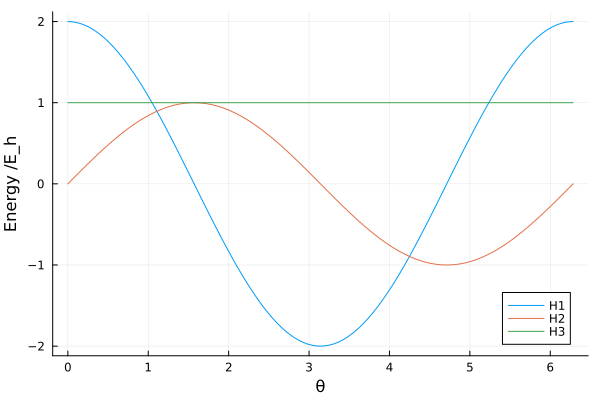

In [38]:
# loop over thetas 100 points from 0 to 2pi
th_grid = range(0, stop=2*pi, length=100)
energy_grid = zeros(100)
#for i in 1:100
#    energy_grid[i] = energy_estimate(th_grid[i])
#end
# plot the energy vs theta in julia 
plot(th_grid, energy_grid, label="Energy estimate", xlabel="θ", ylabel="Energy /E_h")
# plot the energy terms
energy_grid = zeros(100)
energy_terms = zeros(100, 3)
for i in 1:100
    energy_grid[i],energy_terms[i, 1],
    energy_terms[i, 2],energy_terms[i, 3] = energy_estimate(th_grid[i])
end
plot(th_grid, energy_terms[:, 1], label="H1", xlabel="θ", ylabel="Energy /E_h")
plot!(th_grid, energy_terms[:, 2], label="H2", xlabel="θ", ylabel="Energy /E_h")
plot!(th_grid, energy_terms[:, 3], label="H3", xlabel="θ", ylabel="Energy /E_h")


In [ ]:
# multiply the following tensorically 
A = [1 1;0 1];
B = [0; 1; 1];

# A \otimes B
C = kron(A,B)

U = [1/sqrt(2) 1/sqrt(2); -1im/sqrt(2) 1im/sqrt(2)]

# Show U is unitary
@show U*U'

# calcualte complete conjugate transpose
@show U'

In [ ]:
# write test function to check if a matrix is unitary
q.H'-q.H